In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output, display, Math


In [60]:
from keras.datasets import fashion_mnist


# Про dataset `fassion-mnist`

Fashion-MNIST — це набір зображень статей Zalando, що складається з навчального набору з 60 000 прикладів і тестового набору з 10 000 прикладів. Кожен приклад являє собою зображення в градаціях сірого 28x28, пов'язане з міткою з 10 класів:

| Мітка | Опис        | Переклад         |
|-------|-------------|------------------|
| 0     | T-shirt/top | Футболка/сорочка |
| 1     | Trouser     | Штани            |
| 2     | Pullover    | Светр            |
| 3     | Dress       | Плаття           |
| 4     | Coat        | Пальто           |
| 5     | Sandal      | Сандалі          |
| 6     | Shirt       | Сорочка          |
| 7     | Sneaker     | Кросовки         |
| 8     | Bag         | Сумка            |
| 9     | Ankle boot  | Чоботи           |

# Константи

In [61]:
class_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
input_shape = (28, 28, 1)
num_classes = 10


# Підготовка навчального та тестового наборів

In [62]:
# Завантажуємо датасет і розділимо його на навчальну та тестову вибірки.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Нормалізуємо значення пікселів, щоб значення пікселів знаходилось у проміжку від 0 до 1, розділивши яскравість кожного пікселя на 255.
x_train, x_test = x_train / 255., x_test / 255.


# Огляд даних

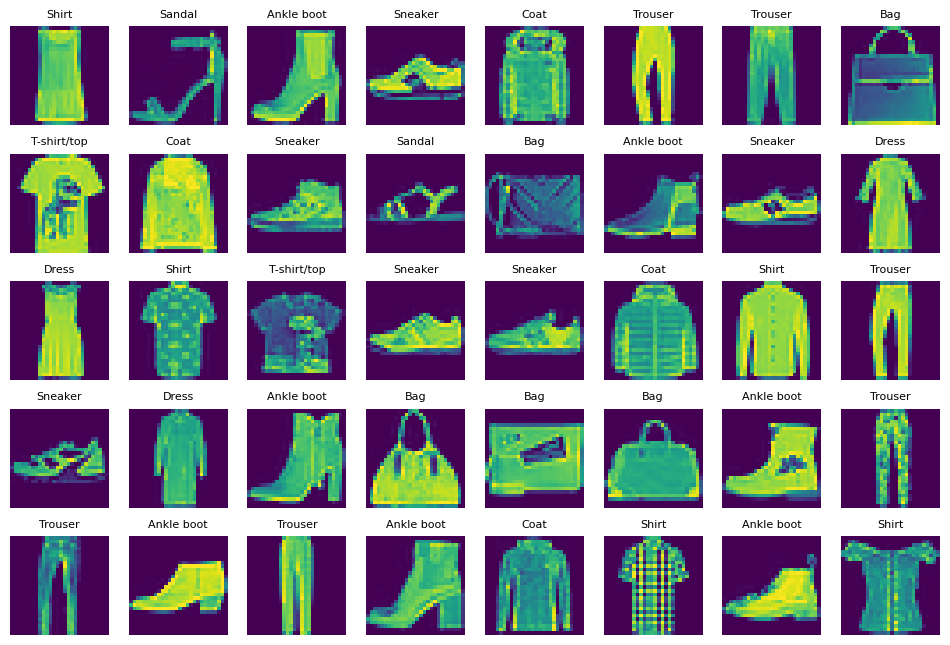

In [63]:
number_of_images = 40
f, ax = plt.subplots(5, 8, figsize=(12, 8))

for i, sample_index in enumerate(np.random.randint(1, x_test.shape[0], number_of_images)):
    test_image = x_test[sample_index].reshape(1, -1)
    test_item = y_test[sample_index]
    ax[i//8, i % 8].imshow(test_image[0].reshape((28, 28)))
    ax[i//8, i % 8].axis('off')
    ax[i//8, i %
        8].set_title(f"{class_labels.get(test_item)}", fontsize=8)
plt.show()


# Побудова Архітектури нейронної мережі (моделі)

1. [Фуннкції активації](https://keras.io/api/layers/activations/)
2. [Оптимізатори](https://keras.io/api/optimizers/)
3. [Функції втрат](https://keras.io/api/losses/)
4. [Метрики](https://keras.io/api/metrics/)

In [64]:
# Побудова архітектури моделі
from tensorflow.keras.callbacks import LearningRateScheduler

keras.utils.set_random_seed(42)

# Побудова архітектури моделі

def create_model(learning_rate, l2_parameter):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(128, activation='relu',
        kernel_regularizer=regularizers.l2(l2_parameter)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(64, activation='relu',
        kernel_regularizer=regularizers.l2(l2_parameter)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  )
    return model


# Гіперпараметри

Друге правило радіоаматора: не можна крутити дві ручки одночасно!

In [65]:
epochs = 30
steps_per_epoch = 1_000
batch_size = 64*2
l2_parameter = 1e-4
learning_rate = 1e-3
model = create_model(learning_rate, l2_parameter)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

# Навчання моделі

In [66]:
# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(256).prefetch(1)


# Навчання моделі
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test)
)

# Оцінка моделі на тестовому наборі даних
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')


Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.6658 - accuracy: 0.7740 - val_loss: 0.4847 - val_accuracy: 0.8421
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4747 - accuracy: 0.8421 - val_loss: 0.4503 - val_accuracy: 0.8483
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4361 - accuracy: 0.8555 - val_loss: 0.4309 - val_accuracy: 0.8542
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4173 - accuracy: 0.8637 - val_loss: 0.4150 - val_accuracy: 0.8624
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4015 - accuracy: 0.8684 - val_loss: 0.4053 - val_accuracy: 0.8666
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3909 - accuracy: 0.8725 - val_loss: 0.4035 - val_accuracy: 0.8676
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3814 - accuracy: 0.8760 - val_loss: 0.3887 - val_accuracy: 0.8773
Epoch 

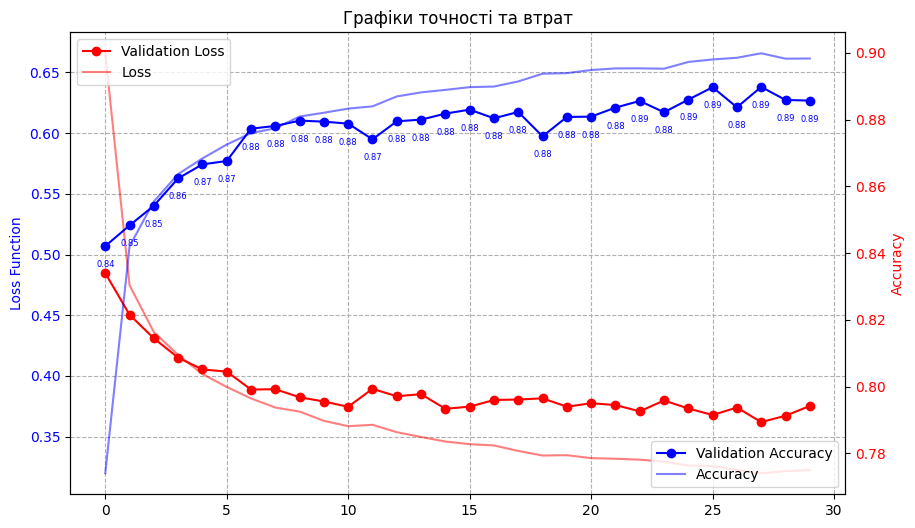

In [67]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(history.history['val_loss'], label='Validation Loss', marker='o', color='r')
ax1.plot(history.history['loss'], label='Loss', color='r', alpha=0.5)
ax1.set_ylabel('Loss Function', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(history.history['val_accuracy'], label='Validation Accuracy',  marker='o', color='b')
ax2.plot(history.history['accuracy'], label='Accuracy', color='b', alpha=0.5)
                         
for i, acc in enumerate(history.history['val_accuracy']):
    ax2.annotate(f'{acc:.2f}', (i, acc), textcoords="offset points", xytext=(0, -15), ha='center', c='b', fontsize=6)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax1.grid(True, linestyle='--') 

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.title('Графіки точності та втрат')

plt.show()

In [80]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


# Візуалізація

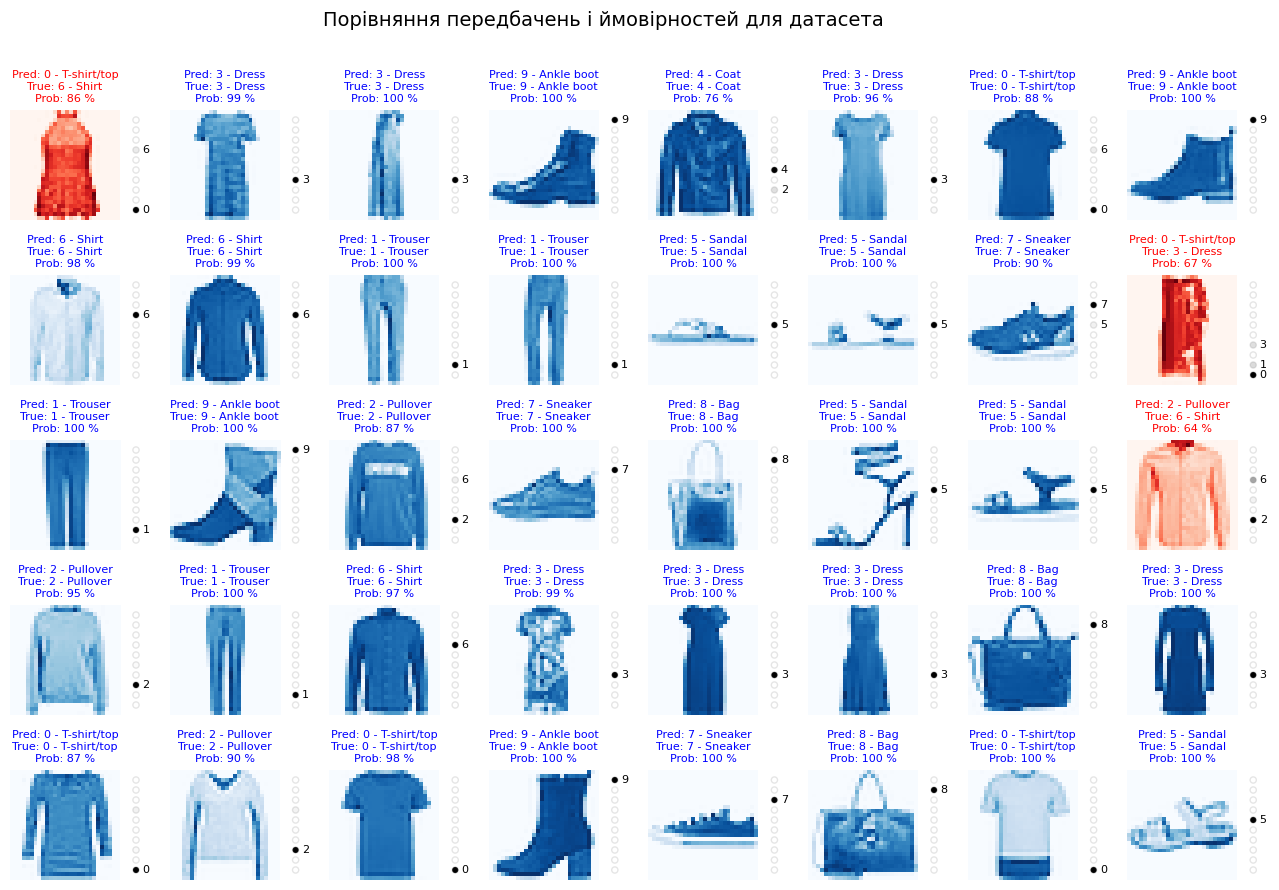

In [181]:
number_of_images = 40
f, ax = plt.subplots(5, 8, figsize=(16, 10))
f.subplots_adjust(hspace=0.5, wspace=0.3)

f.suptitle("Порівняння передбачень і ймовірностей для датасета", fontsize=14)


for axes_index, sample_index in enumerate(np.random.choice(10000, number_of_images)):
    prob = predictions[sample_index]
    img, true_label = x_test[sample_index], y_test[sample_index]
    predicted_label = np.argmax(prob)
    if predicted_label == true_label:
        color = 'blue'
        cmap = 'Blues'
    else:
        color = 'red'
        cmap = 'Reds'

    ax[axes_index//8, axes_index % 8].imshow(img, cmap=cmap)
    ax[axes_index//8, axes_index % 8].axis('off')
    ax[axes_index//8, axes_index %
        8].set_title(f"Pred: {predicted_label} - {class_labels.get(predicted_label)}\nTrue: {true_label} - {class_labels.get(true_label)}\nProb: {prob.max()*100:.0f} %", fontsize=8, color=color)
    
    inset_ax = f.add_axes([ax[axes_index//8, axes_index % 8].get_position().x1, ax[axes_index//8, axes_index % 8].get_position().y0, 0.02, ax[axes_index//8, axes_index % 8].get_position().height])

    classes = np.arange(len(class_labels))
    inset_ax.scatter(np.ones(10)*0.5, 
                     classes, 
                     s=20, 
                     c=prob, 
                     cmap='Greys', 
                     marker='o',
                     edgecolor=(0.5, 0.5, 0.5, 0.2)
                     )
    inset_ax.set_xlim(0, 1)
    inset_ax.set_ylim(-1, 10)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.axis('off')
    for i, p in enumerate(prob):
        if p > 0.1:
            inset_ax.text(0.7, i, f'{i}', fontsize=8, verticalalignment='center')

plt.show()

На візуалізації представлені зображення із тестової вибірки. В синіх тонах - розпізнані правильно, в червоних - неправильно. Праворуч наведена шкала, колір якої пропорційний ймовірності розпізнавання, також праворуч наведені мітки класів, якщо їх ймовірність більше 10 % щоб можна побачити принаймні, де наша модель мала "сумніви", і врешті решт якому класу вона давала перевагу. 

# Висновки

В експериментах я пробував додавати певне число нейронних шарів, змінював активаційні функції та оптимізатори, а також інші гіперпараметри. Однак я домігся точності лише $89$ % уже для простої архітектури нейронної мережі і стандартного оптимізатора `Adam`. Ускладнення архітектури, використання інших оптимізаторів та гіерпараметрів не допомагали перевищували цю точність, і більше того навіть подовжували процес навчання. 

1. Регуляризація: збільшення параметру регуляризації зменшує перенавчання, до добре видно на графіку залежностей Функції втрат від номеру епохи для тренувальної та тестової вибірок, при підвищенні цього параметрі криві майже накладаються одна на одну, однак при цьому точність погіршується.
2. Використання алгоритму `Dropout` дешо покращує точність за рахунок зменшення "спеціалізації нейронів", але не суттєво.

На жаль, використання нейогонної мережі на основі повнозв'язниих шарів не дає можливості (принаймні я не знайшов краших параметрів) якіб давали точність $ > 91$ %

# Посилання

1. [Базовая классификация: Классифицировать изображения одежд](https://www.tensorflow.org/tutorials/keras/classification?hl=ru)